CUSTOMER SEGMENTATION AND DEPOSIT DETECTION SYSTEM CASE STUDY


In [1]:
# Import necessary libraries

# Data analysis libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Clustering Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score
from IPython.display import Image

# Classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# !pip install xgboost
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 233.8 kB/s eta 0:07:07
   ---------------------------------------- 0.1/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.1/99.8 MB 267.9 kB/s eta 0:06:12
   ---------------------------------------- 0.1/99.8 MB 267.9 kB/s eta 0:06:12
   ---------------------------------------- 0.1/99.8 MB 276.8 kB/s eta 0:06:00
   ---------------------------------------- 0.2/99.8 MB 297.7 kB/s eta 0:05:35
   ---------------------------------------- 0.2/99.8 MB 400.1 kB/s eta 0:04:09
   ---------------------------------------- 0.2/99.8 MB 400.1 kB/s eta

In [2]:
# Load the dataset

df = pd.read_csv(r"C:\Users\PC\Downloads\bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Data Dictionary

- Age: This refers to the age of the customer who holds the bank account.
- Job: This feature indicates the type of job that the customer has.
- Marital: This feature indicates the marital status of the customer, which could be "married," "divorced," or "single".
- Education: This refers to the education level of the customer, which could be "primary," "secondary," or "tertiary."
- Default: This feature indicates whether the customer has previously defaulted on a loan or credit card payment, which could
be "yes" or "no.“
- Balance: This feature represents the current balance in the customer's account.
- Housing: This feature indicates whether the customer has a housing loan or not, which could be "yes" or "no."
- Loan: This feature indicates whether the customer has a personal loan or not, which could be "yes" or "no."
- Contact: This feature indicates the method of contact used to reach out to the customer, which could be "cellular,"
"telephone," or "unknown.“
- Day: This feature represents the day of the month when the customer was last contacted.
- Month: This feature represents the month of the year when the customer was last contacted.
- Duration: This feature represents the duration of the last contact with the customer, in seconds.
- Campaign: This feature represents the number of contacts made to the customer during this campaign.
- Pdays: This feature represents the number of days that passed by after the customer was last contacted from a previous
campaign.
- Previous: This feature represents the number of contacts made to the customer before this campaign.
- Poutcome: This feature indicates the outcome of the previous marketing campaign, which could be "success," "failure," or
"unknown."
- Deposit: This feature indicates whether the customer has made a deposit, which could be "yes" or "no."

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000




# Exploratory Data Analysis

## Univariate Analysis

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Age

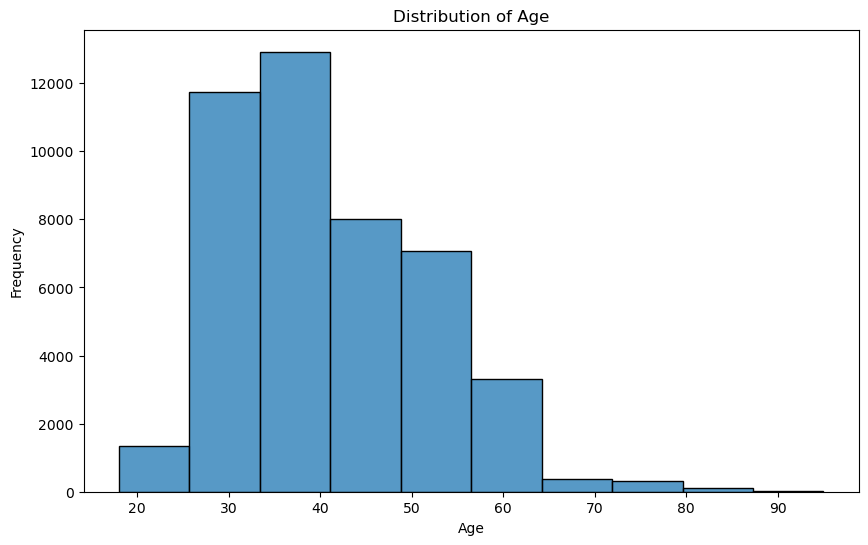

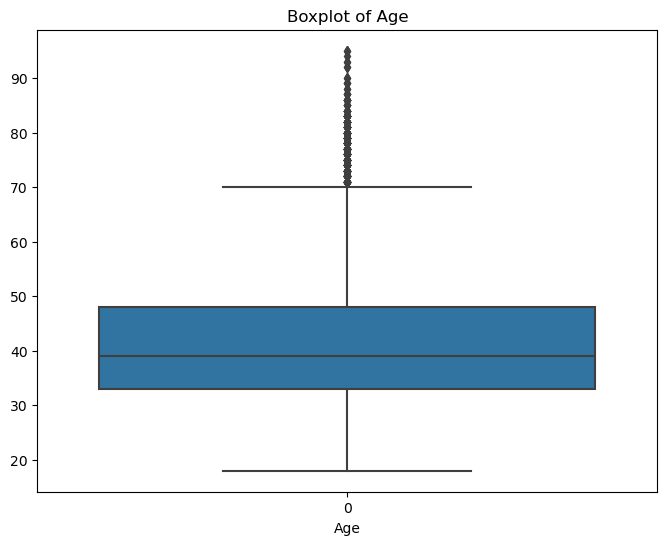

In [7]:
# Descriptive statistics
df['age'].describe()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(df['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


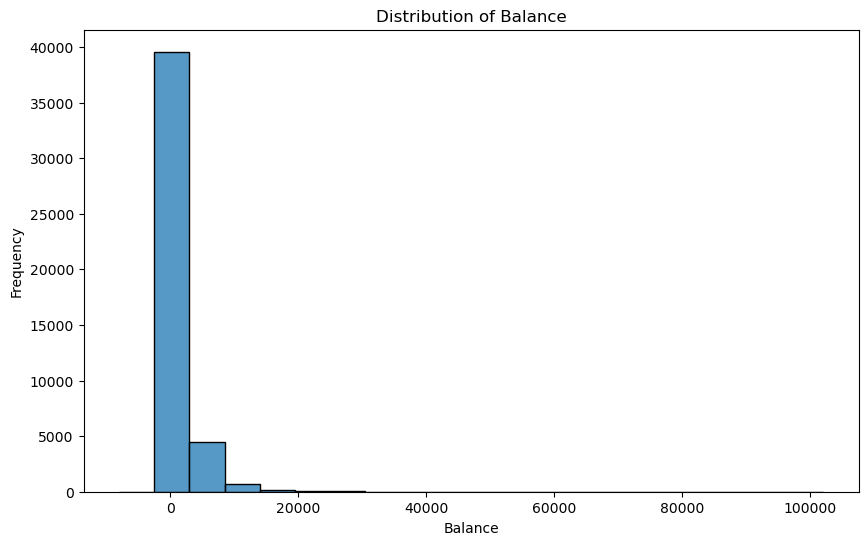

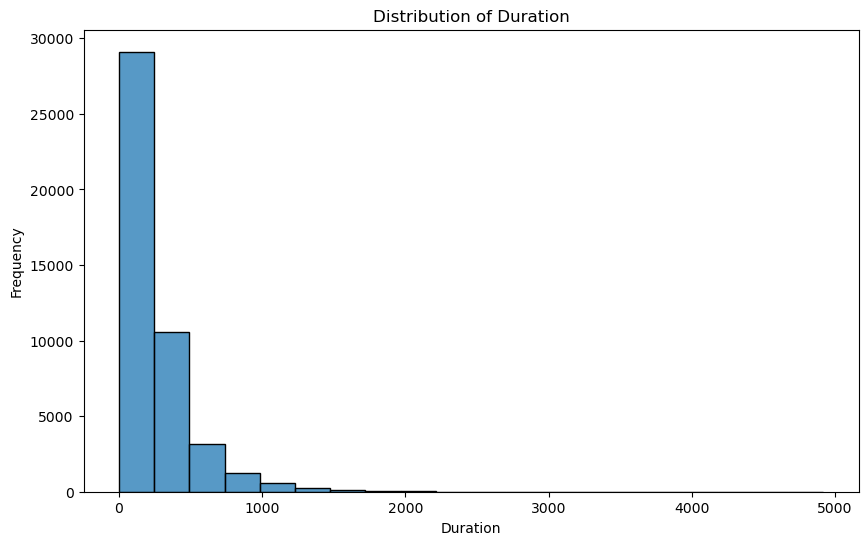

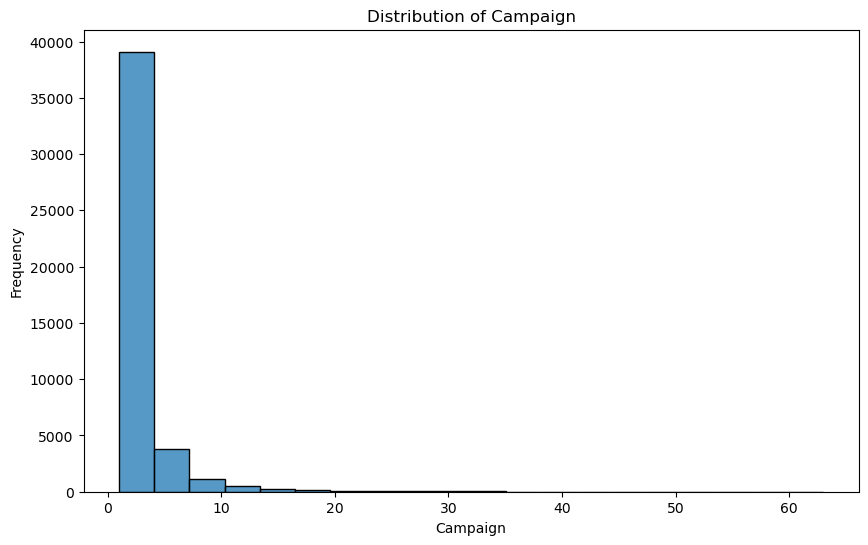

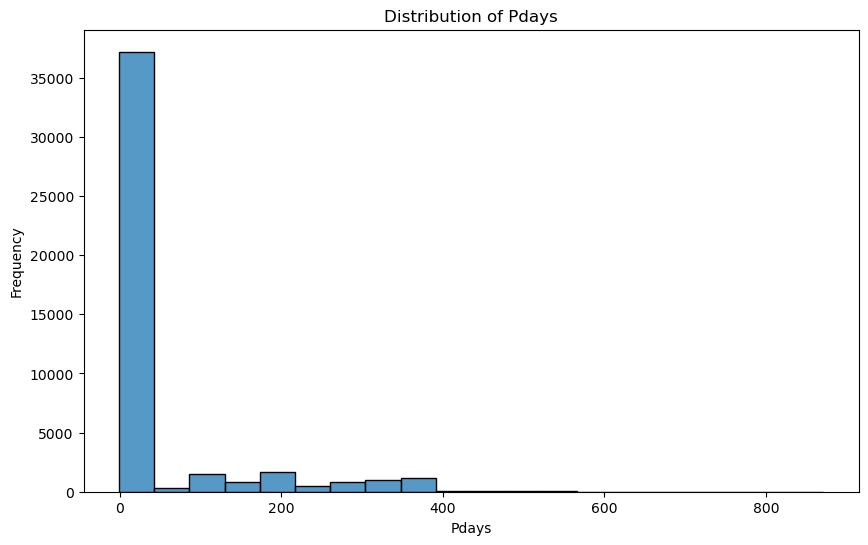

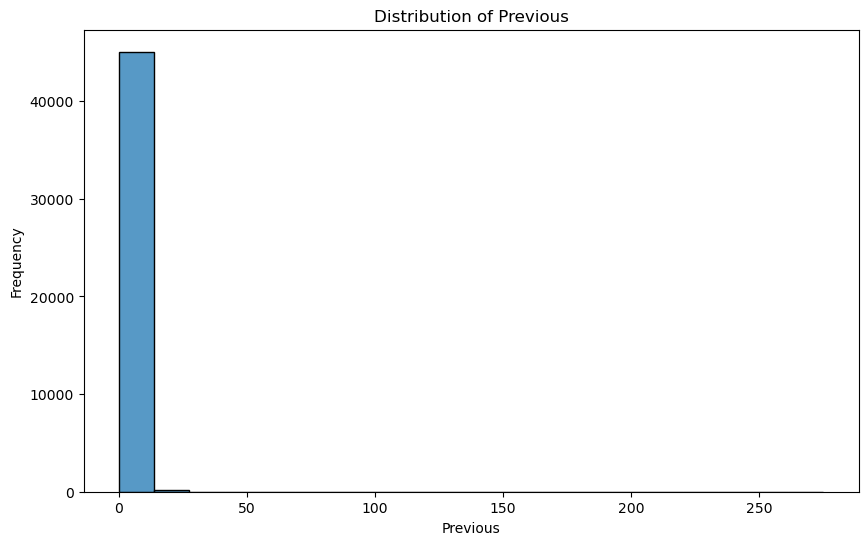

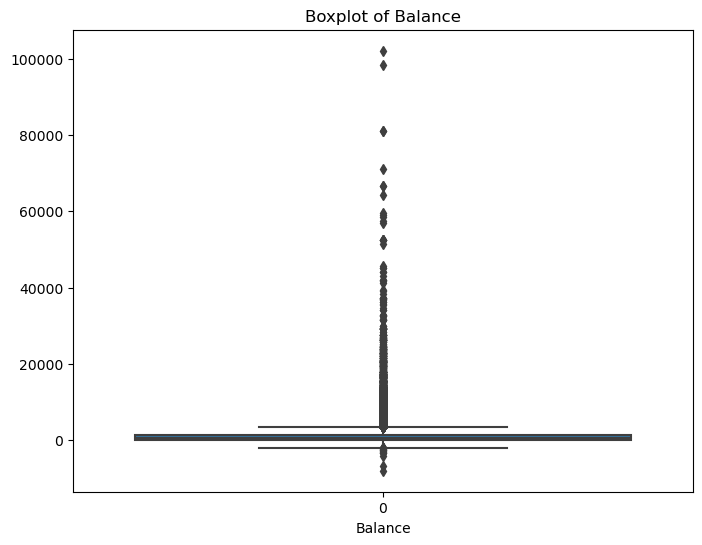

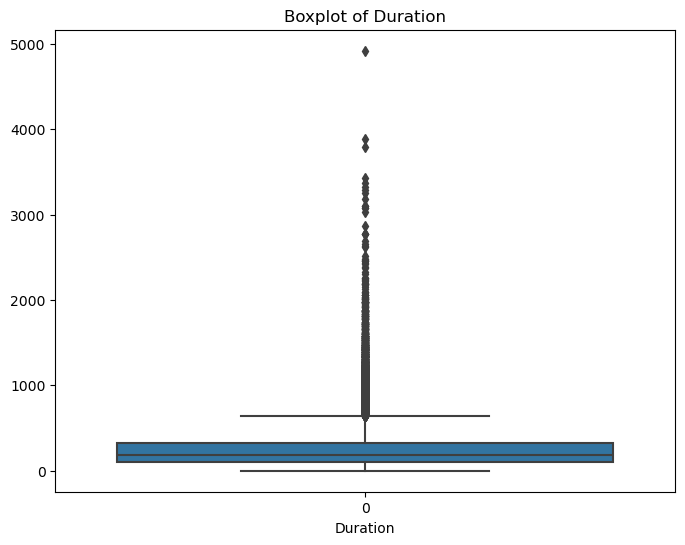

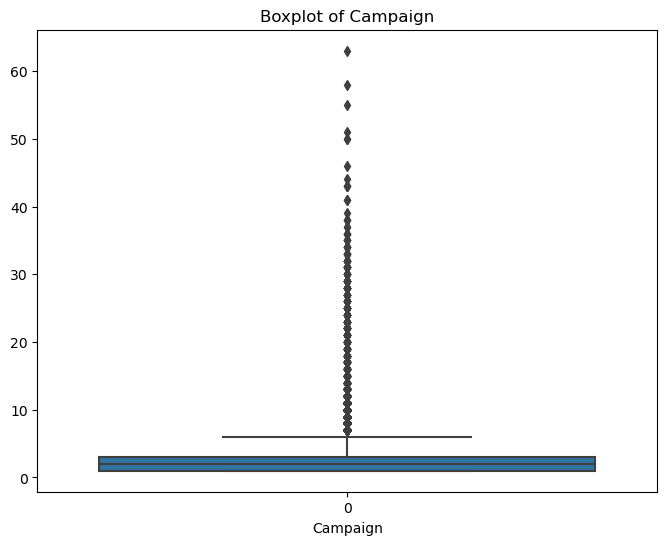

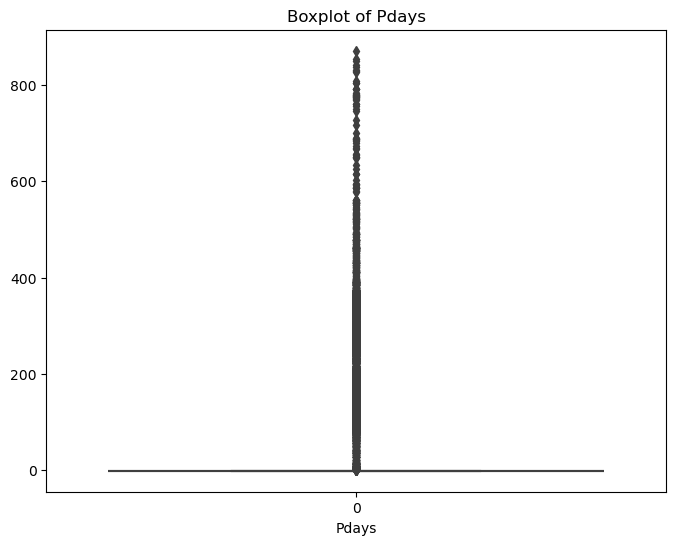

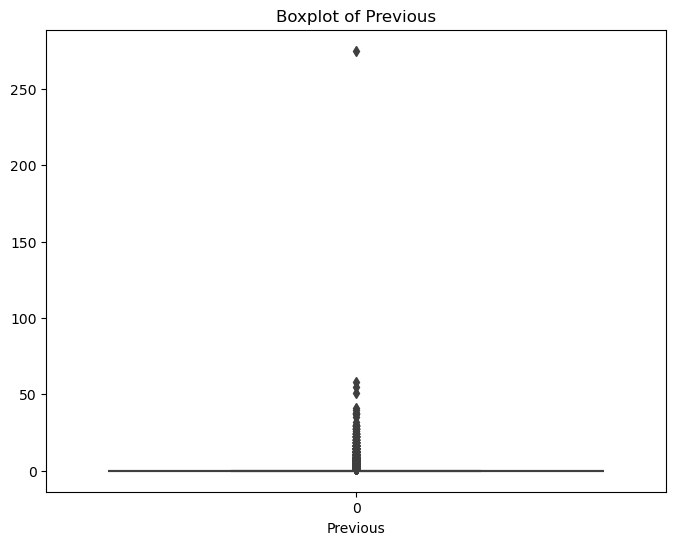

In [8]:

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], bins=20)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=20)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['campaign'], bins=20)
plt.title('Distribution of Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['pdays'], bins=20)
plt.title('Distribution of Pdays')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['previous'], bins=20)
plt.title('Distribution of Previous')
plt.xlabel('Previous')
plt.ylabel('Frequency')
plt.show()

# Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(df['balance'])
plt.title('Boxplot of Balance')
plt.xlabel('Balance')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['duration'])
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['campaign'])
plt.title('Boxplot of Campaign')
plt.xlabel('Campaign')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['pdays'])
plt.title('Boxplot of Pdays')
plt.xlabel('Pdays')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['previous'])
plt.title('Boxplot of Previous')
plt.xlabel('Previous')
plt.show()


## Bivariate Analysis

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


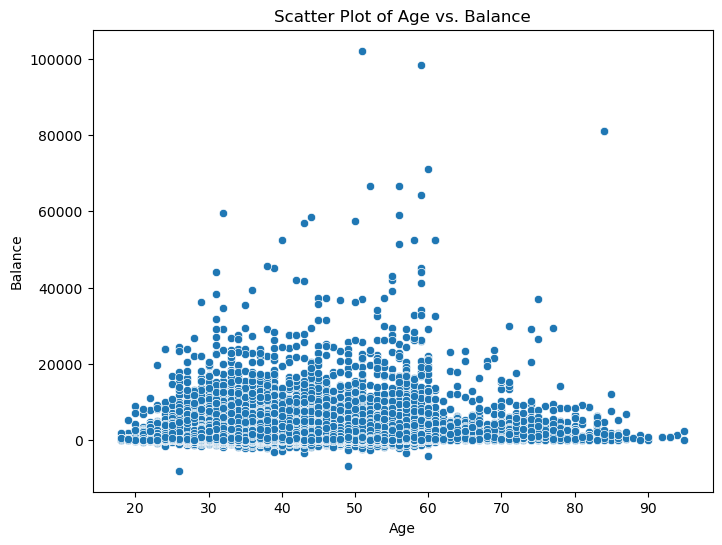

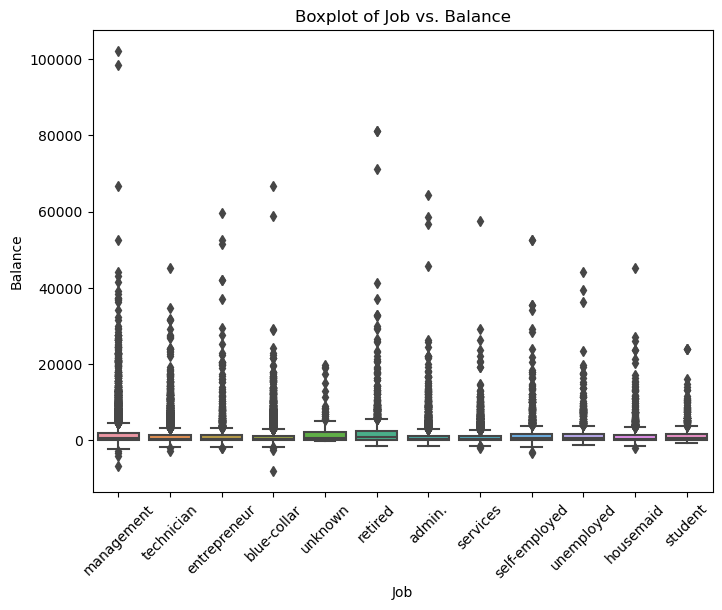

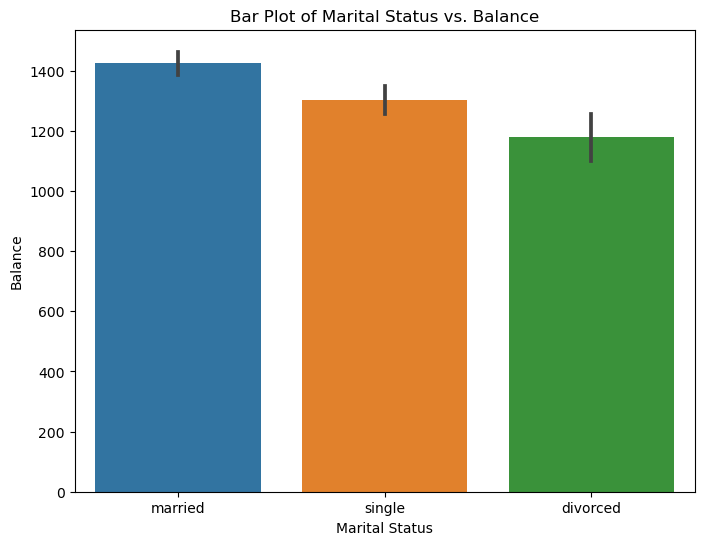

In [10]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='balance', data=df)
plt.title('Scatter Plot of Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='job', y='balance', data=df)
plt.title('Boxplot of Job vs. Balance')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='marital', y='balance', data=df)
plt.title('Bar Plot of Marital Status vs. Balance')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.show()


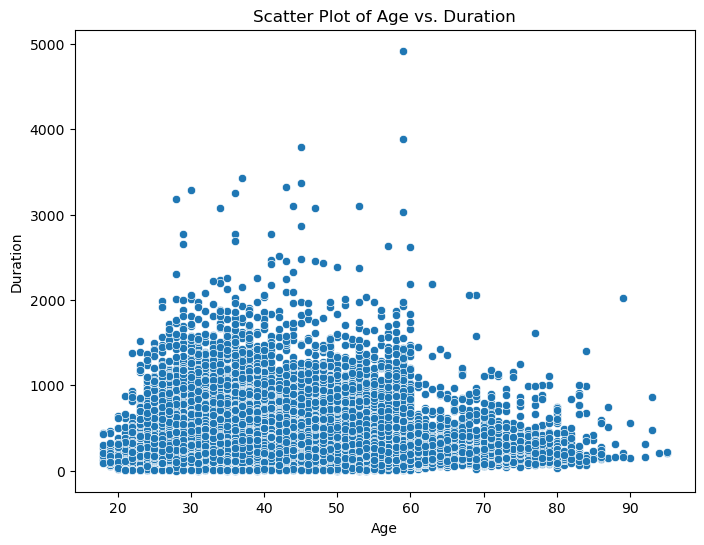

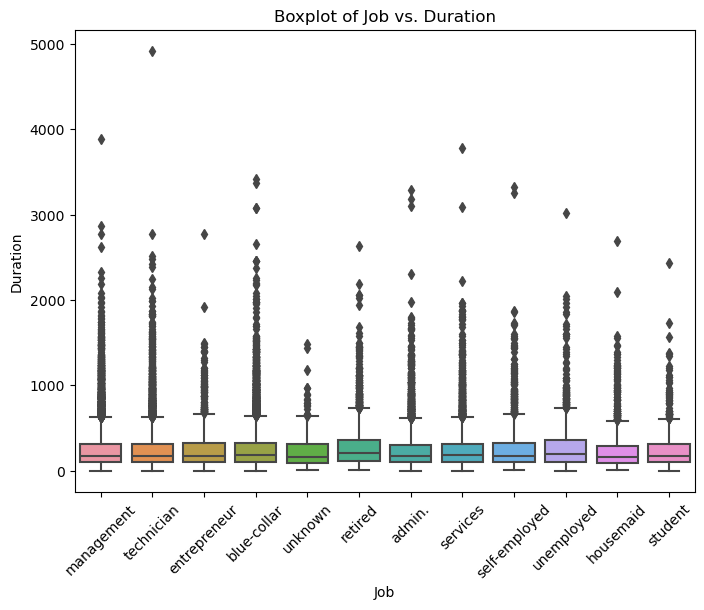

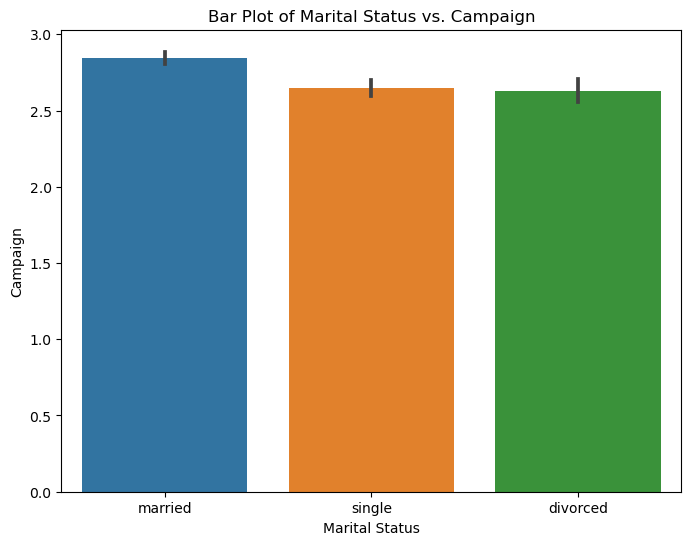

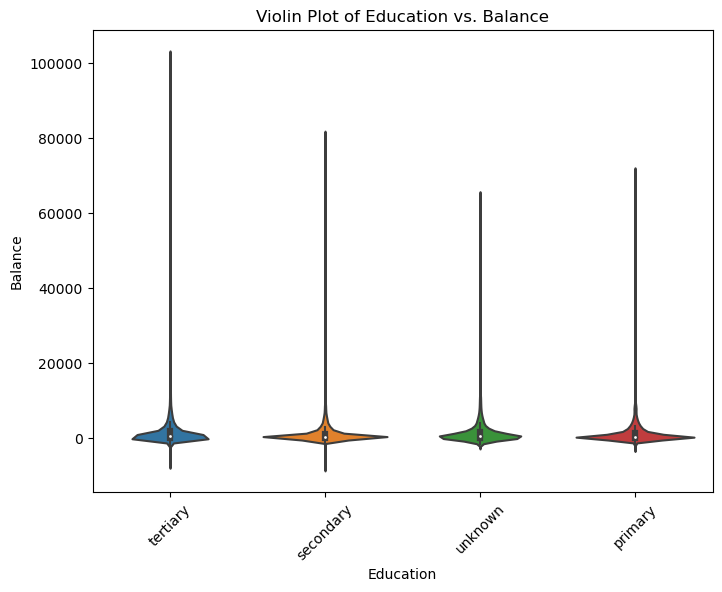

In [11]:
# Scatter plot: Age vs. Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='duration', data=df)
plt.title('Scatter Plot of Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

# Boxplot: Job vs. Duration
plt.figure(figsize=(8, 6))
sns.boxplot(x='job', y='duration', data=df)
plt.title('Boxplot of Job vs. Duration')
plt.xlabel('Job')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.show()

# Bar plot: Marital vs. Campaign
plt.figure(figsize=(8, 6))
sns.barplot(x='marital', y='campaign', data=df)
plt.title('Bar Plot of Marital Status vs. Campaign')
plt.xlabel('Marital Status')
plt.ylabel('Campaign')
plt.show()

# Violin plot: Education vs. Balance
plt.figure(figsize=(8, 6))
sns.violinplot(x='education', y='balance', data=df)
plt.title('Violin Plot of Education vs. Balance')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()


## Multivariate Analysis


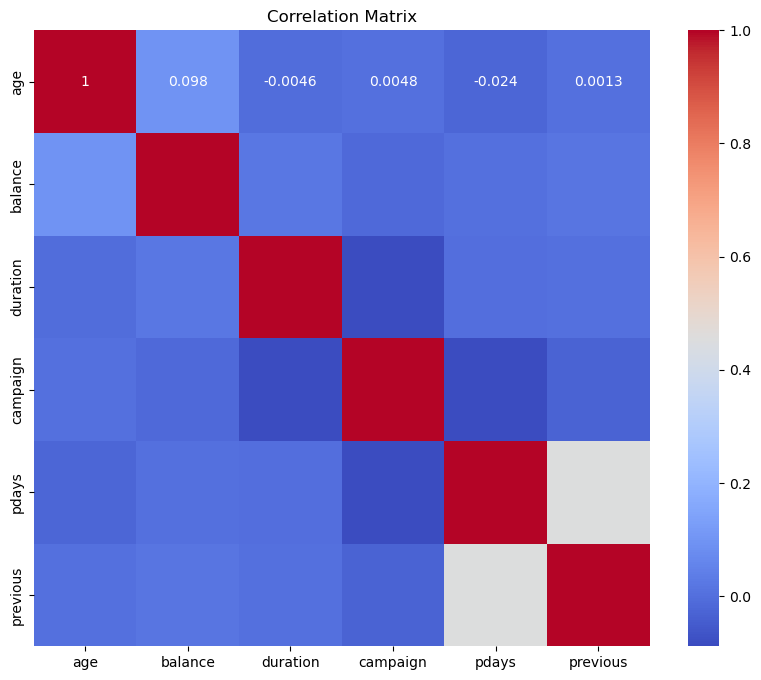

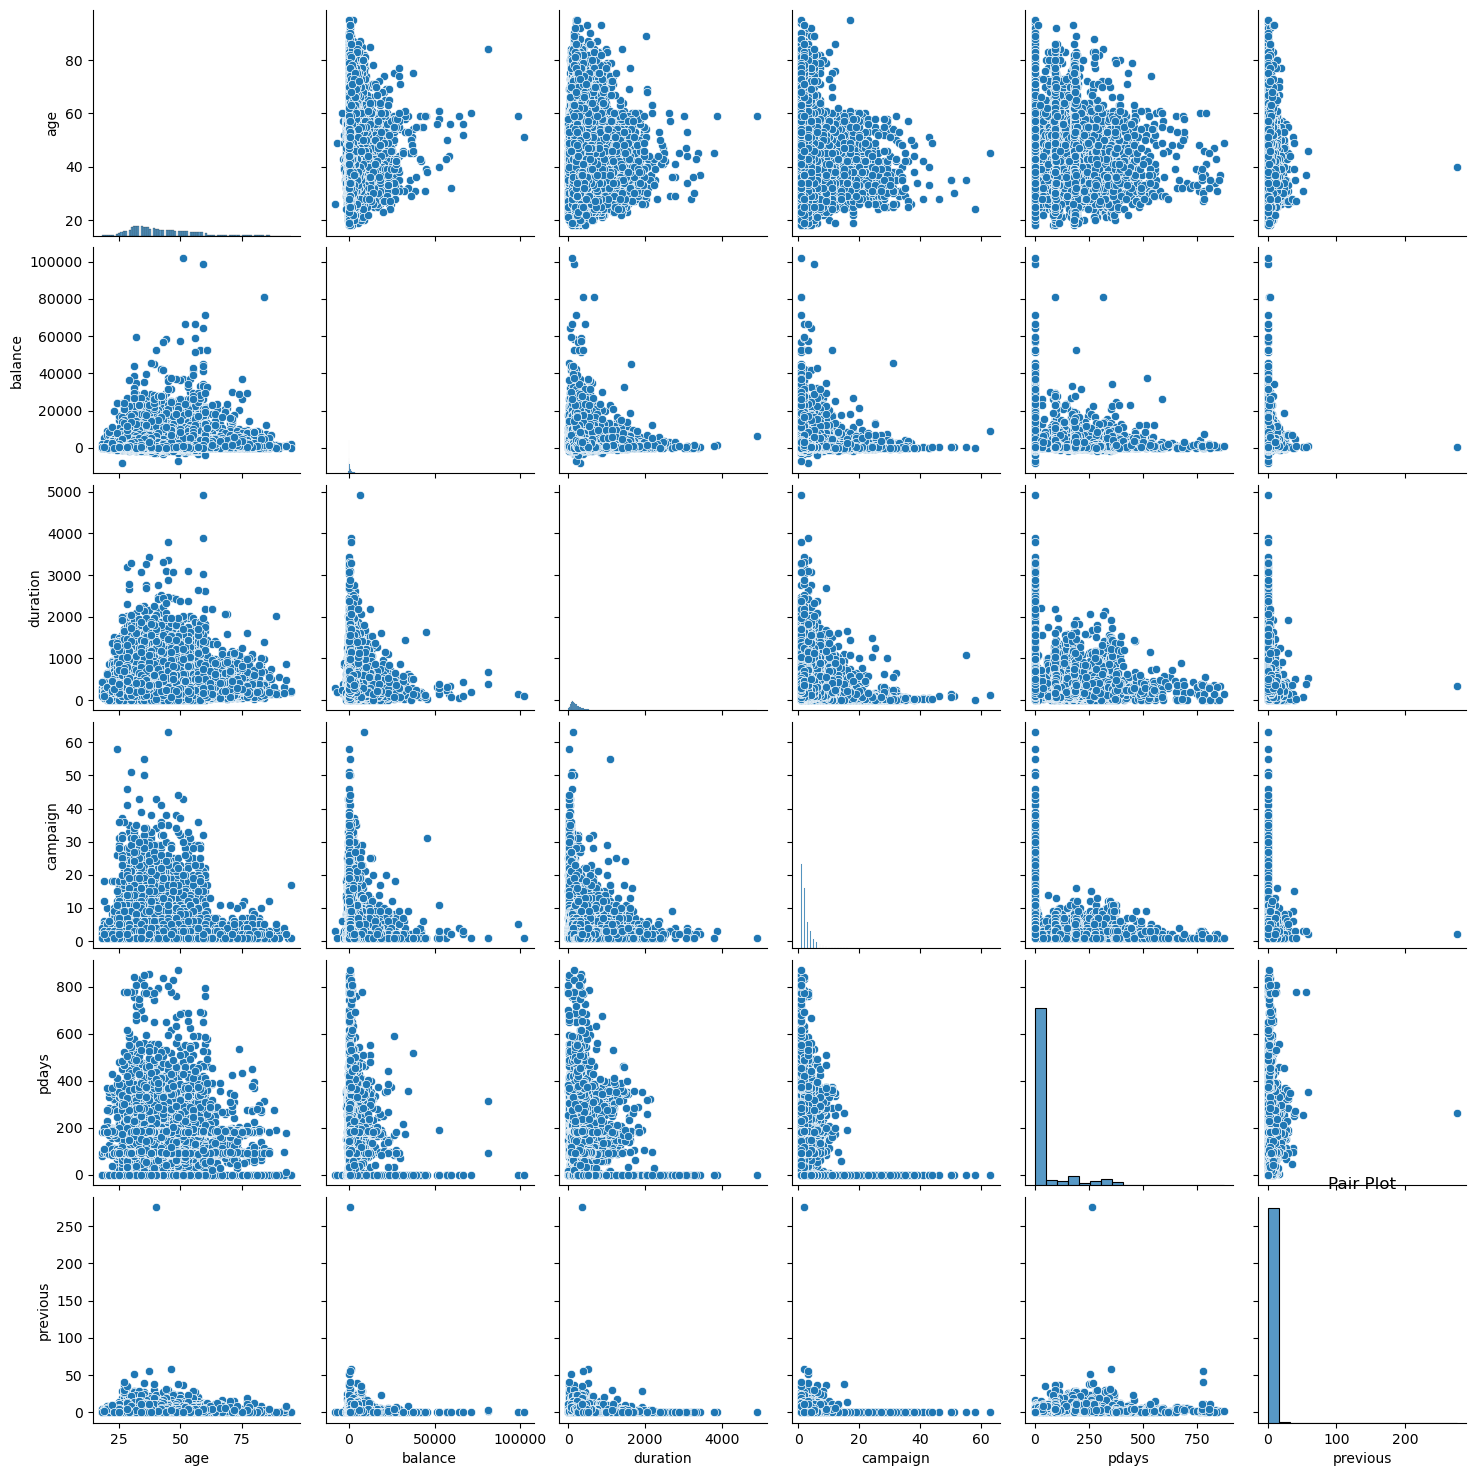

In [12]:
# Select the columns for multivariate analysis
columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Create a subset DataFrame with the selected columns
subset_df = df[columns]

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Pair plot
sns.pairplot(subset_df)
plt.title('Pair Plot')
plt.show()


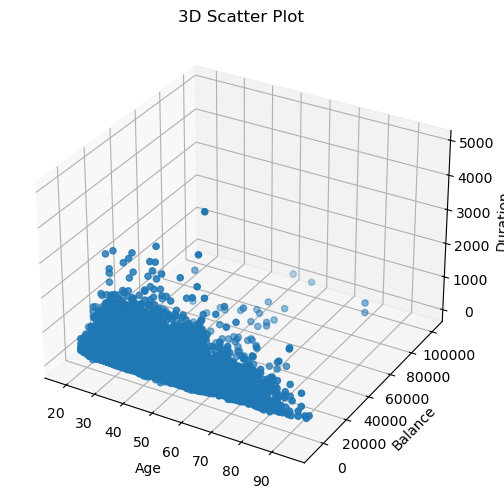

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['balance'], df['duration'])
ax.set_xlabel('Age')
ax.set_ylabel('Balance')
ax.set_zlabel('Duration')
plt.title('3D Scatter Plot')
plt.show()


# Unsupervised Learning

CLustering

## Data preprocessing



In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:

# Clustering Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score
from IPython.display import Image



from sklearn.preprocessing import LabelEncoder

In [16]:
# Checking for duplicates

print(df.duplicated().sum())

0


In [17]:
# label encoding
encoder = LabelEncoder()

# looping for columns except survived
for c in df.columns[1:]:
    if(df[c].dtype=='object'):
        
        df[c] = encoder.fit_transform(df[c])
    else:
        df[c] = df[c]

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [19]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scale_numeric(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Select the columns to be scaled
scaled_columns = ['balance', 'duration']

# Perform min-max scaling on selected columns
scaled_data = min_max_scale_numeric(df, scaled_columns)

# Print the scaled data
scaled_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,0.092259,1,0,2,5,8,0.053070,1,-1,0,3,0
1,44,9,2,1,0,0.073067,1,0,2,5,8,0.030704,1,-1,0,3,0
2,33,2,1,1,0,0.072822,1,1,2,5,8,0.015453,1,-1,0,3,0
3,47,1,1,3,0,0.086476,1,0,2,5,8,0.018707,1,-1,0,3,0
4,33,11,2,3,0,0.072812,0,0,2,5,8,0.040260,1,-1,0,3,0


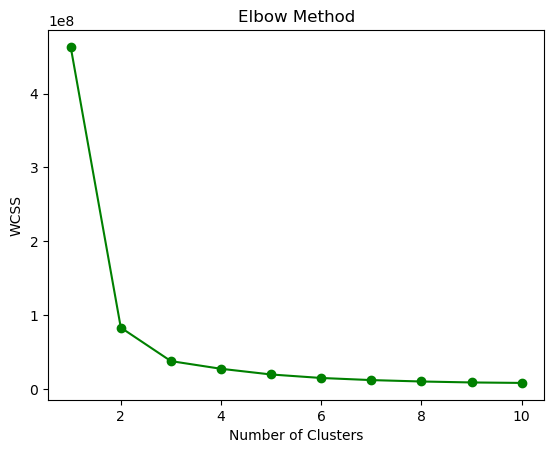

In [20]:
# using elbow method to determine tyhe optimal number of clusters for thuis dataset
wcss = []
max_clusters = 10
for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS against the number of clusters
plt.plot(range(1, max_clusters+1), wcss, color='green', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [21]:
n_clusters = 3  # Optimum number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the dataset
scaled_data['cluster_label'] = kmeans.labels_

# Print the dataset with cluster labels
scaled_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,cluster_label
0,58,4,1,2,0,0.092259,1,0,2,5,8,0.053070,1,-1,0,3,0,0
1,44,9,2,1,0,0.073067,1,0,2,5,8,0.030704,1,-1,0,3,0,0
2,33,2,1,1,0,0.072822,1,1,2,5,8,0.015453,1,-1,0,3,0,0
3,47,1,1,3,0,0.086476,1,0,2,5,8,0.018707,1,-1,0,3,0,0
4,33,11,2,3,0,0.072812,0,0,2,5,8,0.040260,1,-1,0,3,0,0


In [22]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(scaled_data)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(scaled_data)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

# Creating a datagrame"Clust
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2
0,37315,3588,4308


Explained variance ratio (first two components): [0.97877637 0.01101072]


<Figure size 640x480 with 0 Axes>

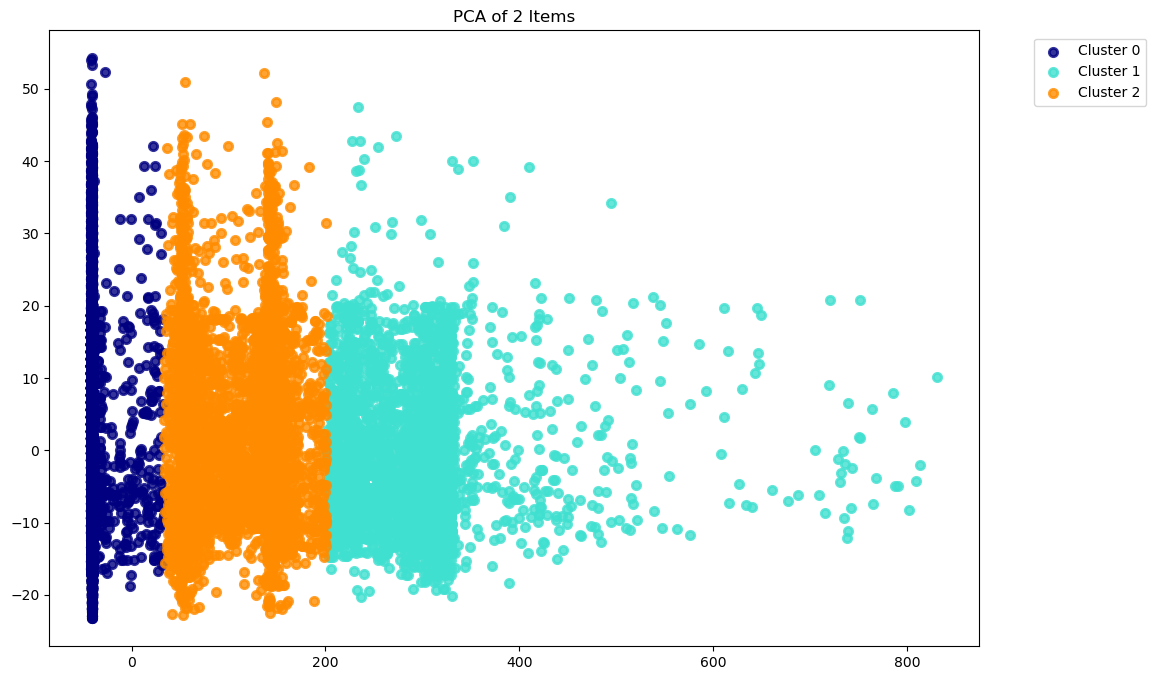

In [23]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = scaled_data
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Explained variance ratio (first two components): [0.97877637 0.01101072]


<Figure size 640x480 with 0 Axes>

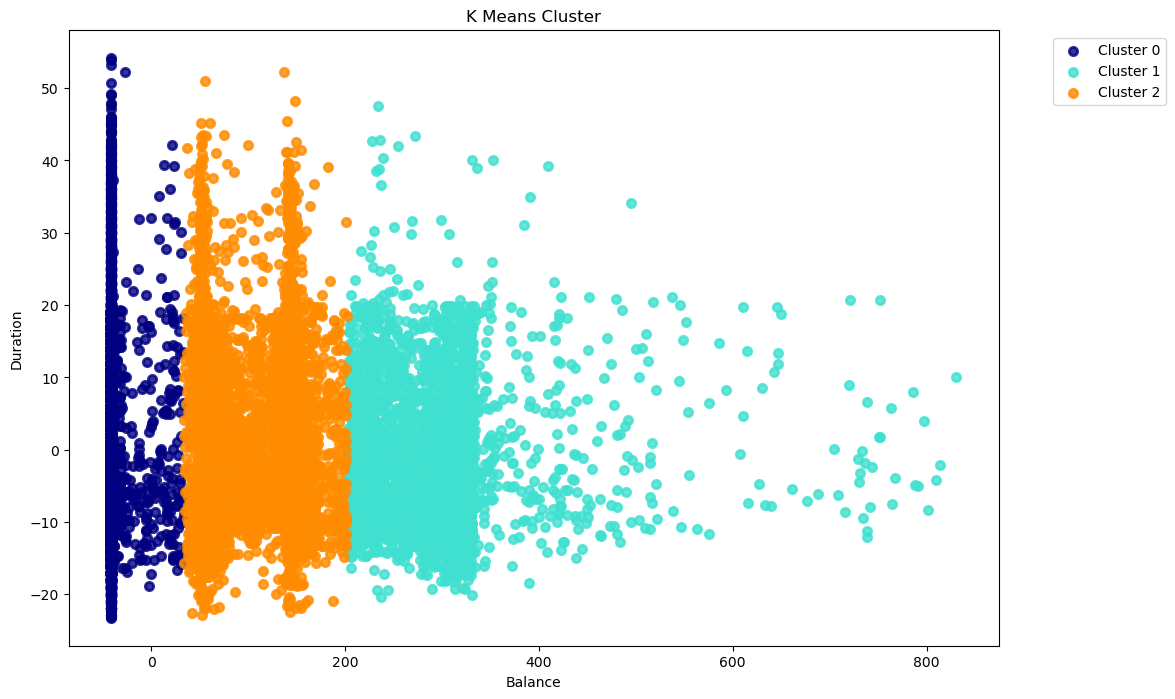

In [24]:
# Running K means on 3 clusters

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(X)

predictions = kmeans.predict(X)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('K Means Cluster')
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.show()

In [25]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Get the feature names
feature_names = X.columns

# Get the weights of the original features for the first two principal components
component_weights = pd.DataFrame(pca.components_, columns=feature_names[:])

# Calculate the percentage contribution of each feature for each component
total_weights = component_weights.abs().sum(axis=1)
component_weights_percentages = (component_weights.abs() / total_weights[:, None]) * 100

# Print the weights as percentages for the first two principal components
print("Weights as percentages for the first two principal components:")
print(component_weights_percentages.iloc[0])
print(component_weights_percentages.iloc[1])



ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [ ]:
df = pd.read_csv(r"C:\Users\PC\Downloads\bank.csv")

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming your data is stored in a pandas DataFrame called 'df'
label_encoder = LabelEncoder()

# Iterate over each column
for col in df.columns:
    # Check if the column contains non-numerical values
    if df[col].dtype == 'object':
        # Apply label encoding
        df[col] = label_encoder.fit_transform(df[col])

# 'data' now contains numerical values for non-numerical columns


In [ ]:
df.head()

In [ ]:

# Separate the target label from the features
y = df['deposit']
X = df.drop('deposit', axis=1)

# 'X' contains the features (all columns except the target label)
# 'y' contains the target label column


In [ ]:
y.head(
)

In [ ]:
X.head(
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the features
scaler.fit(X)

# Transform the features to the scaled representation
X_scaled = scaler.transform(X)
import pandas as pd

# Assuming your scaled data is stored in 'X_scaled'
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Convert to DataFrame with column names

scaled_df.head() # Print the first few rows of the scaled data frame


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Assuming your scaled features are stored in 'X_scaled' and target label in 'y'
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a list of algorithms
algorithms = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Neural Network", MLPClassifier()),
]

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over each algorithm, fit the model, and calculate performance metrics
for name, algorithm in algorithms:
    model = algorithm
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append performance metrics to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a dataframe to store the performance scores
performance_df = pd.DataFrame({
    "Algorithm": [name for name, _ in algorithms],
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

# Convert performance scores to percentages
performance_df["Accuracy"] *= 100
performance_df["Precision"] *= 100
performance_df["Recall"] *= 100
performance_df["F1-Score"] *= 100

# Plot the performance metrics in a column chart
performance_df.plot(x="Algorithm", kind="bar", figsize=(10, 6), rot=45)
plt.ylabel("Performance Score (%)")
plt.title("Performance Metrics for Supervised Learning Algorithms")
plt.show()


In [ ]:
# Define a list of algorithms
algorithms = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Neural Network", MLPClassifier()),
]

# Iterate over each algorithm, fit the model, and compute the confusion matrix
for name, algorithm in algorithms:
    model = algorithm
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
pip install hide_code


In [ ]:
from IPython.display import display, HTML

# Function to hide code cells
def hide_code():
    display(HTML('''
        <script>
            code_show = false;
            function code_toggle() {
                if (code_show) {
                    $('div.input').hide();
                } else {
                    $('div.input').show();
                }
                code_show = !code_show
            }
            $(document).ready(code_toggle);
        </script>
        <form action="javascript:code_toggle()">
            <input type="submit" value="Click here to toggle code on/off">
        </form>
    '''))

# Call the function to hide code cells
hide_code()



In [ ]:
performance_df